In [2]:
import numpy as np
import pandas as pd
import math as m
import time
import sympy as sp

<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>1.Bisection Method</b></h1>
</div>


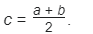

In [3]:
""""Bisection method"""

def bisection(f, a, b, tol = 1.e-6):
    iteration = 0 #initialize counter iteration
    if (f(a) * f(b) < 0.0): # check if there is a root
        while ((b-a) > tol): # check if the end-points converge
            iteration = iteration + 1
            x = (a + b)/2
            if (f(a) * f(x) < 0.0): # if f(b)'s sign equal to f(x)'s sign, then b=x
                b = x
            elif (f(x) * f(b) < 0.0): # if f(a)'s sign equal to f(x)'s sign, then a=x
                a = x
            else:
                break
            print(iteration, x)
    else:
        print('failure')
    return x

In [4]:
import scipy.optimize as spo
def f(x):
    y = np.log(x)+x
    return y

# f(a)'s sign should be different from f(b)'s sign
a = 0.1
b = 1.0
tol = 1.e-4
x = spo.bisect(f, a, b, () , tol)
print('The approximate solution x is: ', x)
print('And the value f(x) is: ', f(x))

The approximate solution x is:  0.567193603515625
And the value f(x) is:  0.0001390223881425623


In [5]:
z = "x**2 + 3*x - 5"
# make a evaluable function and pass it to bisection
f = lambda x: eval(z)
a = 0
b = 2
tol = 1.e-4
x = bisection(f, a, b, tol)

1 1.0
2 1.5
3 1.25
4 1.125
5 1.1875
6 1.21875
7 1.203125
8 1.1953125
9 1.19140625
10 1.193359375
11 1.1923828125
12 1.19287109375
13 1.192626953125
14 1.1925048828125
15 1.19256591796875


<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>2.Newton's Method</b></h1>
</div>


#### In this case, [ f(x) = ln x + x ] and [ f′(x) = 1/x + 1 ]

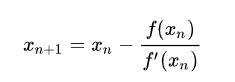

In [6]:
"""Newton's method"""
def newton(f, df, x0, tol = 1.e-6, maxit = 100):
# f = the function f(x)
# df = the derivative of f(x)
# x0 = the initial guess of the solution
# tol = tolerance for the absolute error
# maxit = maximum number of iterations
    err = 1.0
    iteration = 0
    xk = x0
    while (err > tol and iteration < maxit):
        iteration = iteration + 1
        err = xk # error is the previous xk
        xk = xk - f(xk)/df (xk) # xk =xk - f(xk)/f'(xk)
        err = np.abs(err - xk) # compute the new error
        print (iteration, xk)
    return xk

In [7]:
def f(x):
    y = np.log(x) + x
    return y
def df(x):
    y = 1.0 / x + 1.0
    return y
tol = 1.e-4
maxit = 50
x0 = 1.0
x = newton(f, df, x0, tol, maxit)
print ('The aproximate solution is: ', x)
print('And the error is: ', f(x))

1 0.5
2 0.5643823935199818
3 0.5671389877150601
4 0.5671432903993691
The aproximate solution is:  0.5671432903993691
And the error is:  -2.877842408821607e-11


<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>3.Secant Method</b></h1>
</div>


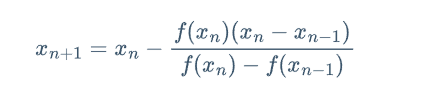

In [8]:
"""Secant method"""
def secant(f, x1, x2, tol = 1.e-6, maxit = 100):
# f = the function f(x)
# x1 = an initial guess of the solution
# x2 = another initial guess of the solution
# tol = tolerance for the absolute error
# maxit = maximum number of iterations
    err = 1.0
    iteration = 0
    while (err > tol and iteration < maxit):
        xk = x1
        xk1 = x2
        iteration = iteration + 1
        err = xk1
        xk1 = xk - f(xk)*(xk-xk1)/(f(xk)-f(xk1))
        err = np.abs(err - xk1)
        x1 = x2
        x2 = xk1
        print(iteration, xk1)
    return xk1

In [9]:
def f(x):
    y = np.log(x) + x
    return y
tol = 1.e-4
maxit = 50
x1 = 1.0
x2 = 2.0
x = secant(f, x1, x2, tol, maxit)
print('The approximate solution is: ', x)
print('And the error is: ', f(x))

1 0.40938389085035876
2 0.651575386390747
3 0.5751035382227284
4 0.5667851889083253
5 0.5671448866112347
6 0.5671432907314143
The approximate solution is:  0.5671432907314143
And the error is:  8.887366398369068e-10


<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>4.Bisection-Trisection method</b></h1>
</div>


In [10]:
""" Bisection-Trisection method"""

def BTsection(f, a, b, tol, imax):
  for i in range(1, imax + 1):  # starts a loop that will iterate from 1 to imax"iteration"
    # Bisection step
    r = (a + b) / 2  # root of bisection
    if f(a) * f(r) < 0:  # check if a , r have oppsite signs
      b = r  # then 'b' will take the value of r
      r = (a + 2 * b) / 3  # calc the new root by using the trisection law
    elif f(r) * f(b) < 0:  # check if b , r have oppsite signs
      a = r  # then 'a' will take the value of r
      r = (2 * a + b) / 3  # calc the new root by using the trisection law

    # Trisection step
    if f(a) * f(r) < 0:  # check if a , r have oppsite signs
      b = r  # then 'b' will take the value of r
    elif f(r) * f(b) < 0:  # check if b , r have oppsite signs
      a = r  # then 'a' will take the value of r

    if abs(f(r)) < tol:  # # check if f(r) less than 10^-12
      return i, r, a, b

  return i, r, a, b




# Example usage
def function(x):
  return sp.exp(x) - 3 * x - 2


imax = 1000
tol = 1e-12
a = 2
b = 3

iterations, root, lower_bound, upper_bound = BTsection(function, a, b, tol, imax)

print("Iterations:", iterations)
print("Approximate root:", root)
print("Bracketing interval:", lower_bound, upper_bound)

Iterations: 23
Approximate root: 2.1253911988112093
Bracketing interval: 2.1253911988111263 2.1253911988112093


<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>5.Newton-Raphson method and bisection method</b></h1>
</div>


In [11]:
"""Newton-Raphson method and bisection method"""

start_time = 0.0
start_time = time.time()

def newton_raphson_with_bisection(f, a, b, eps, imax, h=1e-5):
  if f(a) * f(b) > 0:
    raise ValueError("Root not bracketed")

  def df(x):
    return (f(x + h) - f(x - h)) / (2 * h)

  x = (a + b) / 2
  for i in range(imax):

    if abs(f(x)) < eps:
      return x, i + 1
    d = df(x)
    if d == 0:
      return None, i + 1
    x -= f(x) / d
    if f(a) * f(x) < 0:
      b = x
    else:
      a = x
  return None, imax




def f(x):
  return x * m.exp(x) - 7


initial_approximations = [0, 2]
root, iterations = newton_raphson_with_bisection(f, initial_approximations[0], initial_approximations[1], 1e-12, 1000)
end_time = 0.0
end_time = time.time()
elapsed_time = end_time - start_time

print(f"CPU execution time: {elapsed_time:.10f} seconds")
print("Root:", root)
print("Number of iterations:", iterations)

CPU execution time: 0.0000000000 seconds
Root: 1.5243452049841444
Number of iterations: 7


<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>6.Steffensen’s method</b></h1>
</div>


In [12]:
# Define your function
def func(x):
    return x - 2 * np.exp(-x)

# Steffensen’s method implementation
def steffensen_method(func, xi):
    # Define variables
    error = 1
    count = 0

    # Run until the error is less than 10^-6
    while error >= 1e-6 and count < 100:
        xi_old = xi
        xi = xi - ((func(xi))**2 / (func(xi + func(xi)) - func(xi)))

        # Find your error
        error = abs((xi - xi_old) / xi)

        # Count how many times this program is run
        count += 1

    return xi, error, count

# Set your initial guess
xi = 1.0  # You can change this initial guess if needed

# Run the function
xi, error, count = steffensen_method(func, xi)

# Display the results
if count < 100:
    new_error = error * 1e10
    print(f'The root of your function is at x={xi:.3f}. The error is {new_error:.3f}*10^-10. Your program was run {count} times.')
else:
    print('Your guess is too inaccurate. Try again.')

The root of your function is at x=0.853. The error is 98.638*10^-10. Your program was run 4 times.
